In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv("D:\\titanic new.csv")
print(df)



     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [3]:
df.isnull().sum()
#null vlue counting..

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

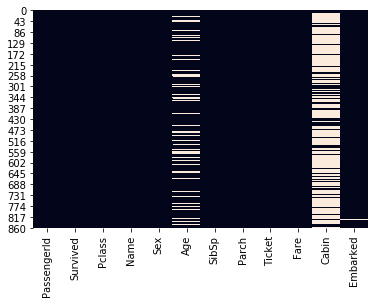

In [4]:
sns.heatmap(df.isnull(),cbar=False)

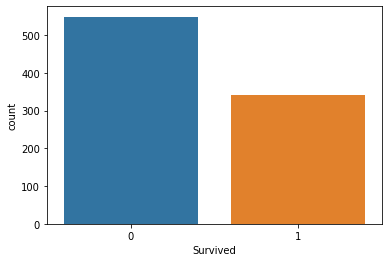

In [5]:
sns.countplot(x='Survived',data=df)
#dead persons count

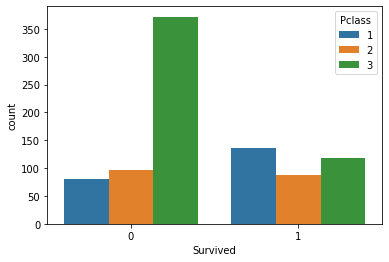

In [6]:
sns.countplot(x='Survived',hue='Pclass',data=df)
#survived and not survived counts in each class 1,2,3

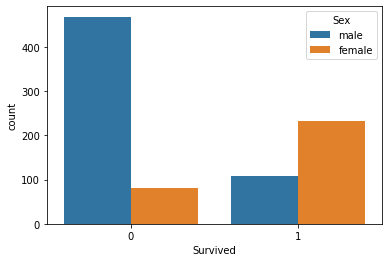

In [7]:
sns.countplot(x='Survived',hue='Sex',data=df)
#counts in male and female

In [8]:
def input_missing_age(columns):
    age=columns[0]
    passenger_class=columns[1]
    if pd.isnull(age):
        if(passenger_class==1):
            return df[df['Pclass']==1]
        ['Age'].mean()
        elif(passenger_class==2):
            return df[df['Pclass']==2]
        ['Age'].mean()
        elif(passenger_class==3):
            return df[df['Pclass']==3]
        ['Age'].mean() 
        else:
            return age

SyntaxError: invalid syntax (<ipython-input-8-255c5414c383>, line 8)

In [10]:
df['Age']=df[['Age','Pclass']].apply(input_missing_age,axis=1)

NameError: name 'input_missing_age' is not defined

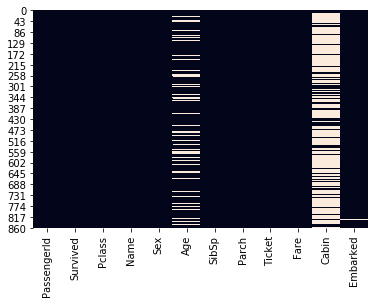

In [11]:
sns.heatmap(df.isnull(),cbar=False)

In [12]:
df.drop('Cabin',axis=1,inplace=True)
df.dropna(inplace=True)
#cabin data is not necessary,also we have not enough cabin values,so finding it's mean is not mean anything to this ,so removing the column

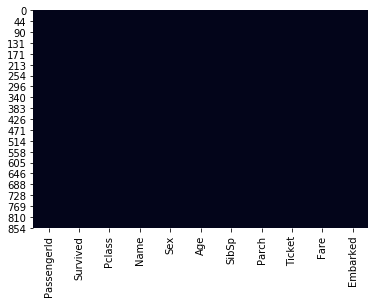

In [13]:
sns.heatmap(df.isnull(),cbar=False)

In [14]:
#data is clean now
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
#encoding,sex data &embarked datas are in texts so change to numbers
sex_data=pd.get_dummies(df['Sex'],drop_first=True)
#removing coloumn of sex,embarked
embarked_data=pd.get_dummies(df['Embarked'],drop_first=True)

In [16]:
sex_data.head()

,male
0,1
1,0
2,0
3,0
4,1


In [17]:
embarked_data.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [19]:
titanic=pd.concat([df,sex_data,embarked_data],axis=1)
titanic.drop(['Name','PassengerId','Ticket','Sex','Embarked','Fare'],axis=1,inplace=True)

In [22]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1


In [24]:
#splitting data into x&y
x=titanic.drop('Survived',axis=1)
y=titanic['Survived']
x.head()

,Pclass,Age,SibSp,Parch,male,Q,S
0,3,22.0,1,0,1,0,1
1,1,38.0,1,0,0,0,0
2,3,26.0,0,0,0,0,1
3,1,35.0,1,0,0,0,1
4,3,35.0,0,0,1,0,1


In [25]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=43)

In [28]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)
predictions=model.predict(xtest)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
from sklearn.metrics import classification_report
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       130
           1       0.75      0.67      0.70        84

    accuracy                           0.78       214
   macro avg       0.77      0.76      0.76       214
weighted avg       0.78      0.78      0.78       214



In [30]:
from sklearn.metrics import log_loss
log_loss(ytest,predictions)

7.585690107065306

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,xtest,ytest,display_labels=["Not survived","Survived"])

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)